In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib

### Preço do Ether

In [32]:
start = 1644451200 #Dia 10/02/2022
end = 1646870400 #Dia 10/03/2022

df_eth = pd.read_csv('export-EtherPrice.csv').query('UnixTimeStamp >= @start and UnixTimeStamp <= @end') #Base de dados disponível em Etherscan
df_eth['Date(UTC)'] = df_eth['Date(UTC)'].apply(lambda x: x.split('/')[1]+'/'+x.split('/')[0])
df_eth

,Date(UTC),UnixTimeStamp,Value
2387,10/2,1644451200,3074.84
2388,11/2,1644537600,2928.93
2389,12/2,1644624000,2918.34
2390,13/2,1644710400,2872.44
2391,14/2,1644796800,2931.12
2392,15/2,1644883200,3185.81
2393,16/2,1644969600,3124.33
2394,17/2,1645056000,2894.42
2395,18/2,1645142400,2780.72
2396,19/2,1645228800,2764.50


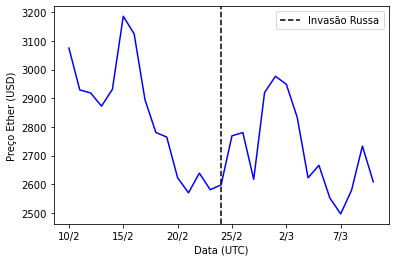

In [38]:
plt.plot(df_eth['Date(UTC)'], df_eth['Value'], color = 'blue')
plt.xlabel('Data (UTC)')
plt.xticks([x for x in range(0,30,5)])
plt.ylabel('Preço Ether (USD)')
plt.axvline(14, color = 'black', linestyle = '--', label = 'Invasão Russa')
plt.legend()
plt.gcf().savefig('ether_val.pdf')

### Transações Diárias

In [47]:
start = 1644451200 #Dia 10/02/2022
end = 1646870400 #Dia 10/03/2022

df_tx = pd.read_csv('export-TxGrowth.csv').query('UnixTimeStamp >= @start and UnixTimeStamp <= @end') #Base de dados disponível em Etherscan
df_tx['Date(UTC)'] = df_tx['Date(UTC)'].apply(lambda x: x.split('/')[1]+'/'+x.split('/')[0])
df_tx['Value'] = df_tx['Value']/1000000
df_tx

,Date(UTC),UnixTimeStamp,Value
2387,10/2,1644451200,1.205676
2388,11/2,1644537600,1.183966
2389,12/2,1644624000,1.114648
2390,13/2,1644710400,1.115296
2391,14/2,1644796800,1.147522
2392,15/2,1644883200,1.192633
2393,16/2,1644969600,1.194693
2394,17/2,1645056000,1.141997
2395,18/2,1645142400,1.252754
2396,19/2,1645228800,1.150162


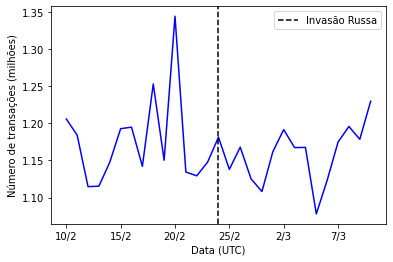

In [50]:
fig, ax = plt.subplots()
plt.plot(df_tx['Date(UTC)'], df_tx['Value'], color = 'blue')
plt.xlabel('Data (UTC)')
plt.xticks([x for x in range(0,30,5)])
plt.ylabel('Número de transações (milhões)')
plt.axvline(14, color = 'black', linestyle = '--', label = 'Invasão Russa')
plt.legend()
#ax.get_yaxis().set_major_formatter(
#    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
#ax.ticklabel_format(useOffset=False)
plt.gcf().savefig('tx_num.pdf')

In [3]:
df = pd.read_csv('fix_war_txs.csv')

### Endereços diários

In [4]:
#TO DO: arrumar definição de endereços ativos e buscar endereços criados 1 mês antes
def active_addresses(df, day): #Retorna endereços ativos no dia enviado como parâmetro
    first_day = df['timestamp'].iloc[0]
    df_query = df.query('timestamp >= @first_day + (@day - 1) * 86400 and timestamp <= @first_day + @day * 86400')
    #return len(pd.concat(df_query.groupby(['from']), df_query.groupby(['to'])).drop_duplicates)
    return len(pd.concat([df_query['from'],df_query['to']]).drop_duplicates())

In [13]:
def accounts_of_week(df): #Chama active_addresses para todos os dias da semana
    accounts = {}
    for i in range(1,8):
        accounts[i] = active_addresses(df, i)
    return accounts

In [27]:
accounts_list = []
df_1 = pd.read_csv('fix_war_txs.csv')
df_1['timestamp'] = df_1['timestamp'].apply(int, base = 16)
accounts_list.append(accounts_of_week(df_1))
del df_1 #Deletando o dataframe da só pra garantir que a máquina não fique sem memória pra lidar com todos ao mesmo tempo

df_2 = pd.read_csv('fix_war_txs_2.csv')
df_2['timestamp'] = df_2['timestamp'].apply(int, base = 16)
accounts_list.append(accounts_of_week(df_2))
del df_2

df_3 = pd.read_csv('fix_war_txs_3.csv')
df_3['timestamp'] = df_3['timestamp'].apply(int, base = 16)
accounts_list.append(accounts_of_week(df_3))
del df_3

df_4 = pd.read_csv('fix_war_txs_4.csv')
df_4['timestamp'] = df_4['timestamp'].apply(int, base = 16)
accounts_list.append(accounts_of_week(df_4))
del df_4

In [5]:
#Converte o formato de lista do accounts list para um dicionário que cabe como dataframe
accounts = {'day': [i for i in range(1,29)]}
df_1 = pd.read_csv('fix_war_txs.csv').query('blockNumber != "0xd84b0c"')
df_1['timestamp'] = df_1['timestamp'].apply(int, base = 16)
accounts['active_accounts'] = [active_addresses(df_1, i) for i in range(1,8)] #semana 1
del df_1

df_2 = pd.read_csv('fix_war_txs_2.csv')
df_2['timestamp'] = df_2['timestamp'].apply(int, base = 16)
accounts['active_accounts'].extend([active_addresses(df_2, i) for i in range(1,8)]) #semana 2
del df_2

df_3 = pd.read_csv('fix_war_txs_3.csv')
df_3['timestamp'] = df_3['timestamp'].apply(int, base = 16)
accounts['active_accounts'].extend([active_addresses(df_3, i) for i in range(1,8)]) #semana 3
del df_3

df_4 = pd.read_csv('fix_war_txs_4.csv')
df_4['timestamp'] = df_4['timestamp'].apply(int, base = 16)
accounts['active_accounts'].extend([active_addresses(df_4, i) for i in range(1,8)]) #semana 4
del df_4

accounts

{'day': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28],
 'active_accounts': [553651,
  548750,
  522239,
  535487,
  539107,
  534940,
  507449,
  500934,
  467544,
  491830,
  511354,
  469013,
  481191,
  505483,
  513537,
  520622,
  554941,
  516996,
  501020,
  530733,
  549565,
  539968,
  532599,
  505916,
  527818,
  540352,
  594994,
  569226]}

In [6]:
acc_df = pd.DataFrame(accounts)
acc_df

,day,active_accounts
0,1,553651
1,2,548750
2,3,522239
3,4,535487
4,5,539107
5,6,534940
6,7,507449
7,8,500934
8,9,467544
9,10,491830


In [9]:
#Pré-coleta de dados: une todos as contas com atividade no período anterior, que compunham os accs.csv em um dataframe único

df_acc = pd.read_csv('accs.csv')
df_acc_aux = pd.concat([df_acc['from'],df_acc['to']]).drop_duplicates()
del df_acc
df_acc = pd.read_csv('accs_2.csv')
df_acc_aux = pd.concat([df_acc_aux,df_acc['from'],df_acc['to']]).drop_duplicates()
del df_acc
df_acc = pd.read_csv('accs_3.csv', header = None, names = ['from', 'to'])
df_acc_aux = pd.concat([df_acc_aux,df_acc['from'],df_acc['to']]).drop_duplicates()
del df_acc
df_acc_aux

0          0x6566bc39b9da4ca321b30e46551c5c4c3618f6d4
1          0x9cd9aefbd6d423f69f5c9caf2fa9972381012b09
2          0xf60c2ea62edbfe808163751dd0d8693dcb30019c
4          0x5d7142c223ced450fafe5979f75f59aa08e18c11
5          0xf66852bc122fd40bfecc63cd48217e88bda12109
                              ...                    
8072047    0x3cd2761730bf3d7b8efc14c8c1f886d5a0e20b86
8072052    0xd852c1572466e0f821929b8a2adbdadf92b436ee
8072075    0x4941525510257fc5f64c452c6fb8d57ca7345e49
8072099    0xc3cb2bf9d2d4fd214432cb59a62f65de6dc24501
8072111    0x6b0e16e1dde76ca856d35b46707c8b9edd579110
Length: 5117856, dtype: object

In [7]:
def new_address(df, day, actives):
    old_size = len(actives)
    first_day = df['timestamp'].iloc[0]
    df_query = df.query('timestamp >= @first_day + (@day - 1) * 86400 and timestamp <= @first_day + @day * 86400')
    curr_df = pd.concat([df_query['from'],df_query['to']]).drop_duplicates()
    actives = actives.append(curr_df).drop_duplicates()
    return len(actives) - old_size

In [10]:
accounts = {'day': [i for i in range(1,29)]}
df_1 = pd.read_csv('fix_war_txs.csv').query('blockNumber != "0xd84b0c"')
df_1['timestamp'] = df_1['timestamp'].apply(int, base = 16)
accounts['active_accounts'] = [active_addresses(df_1, i) for i in range(1,8)] #semana 1
accounts['new_accounts'] = [new_address(df_1, i, df_acc_aux) for i in range(1,8)]
    
del df_1

df_2 = pd.read_csv('fix_war_txs_2.csv')
df_2['timestamp'] = df_2['timestamp'].apply(int, base = 16)
accounts['active_accounts'].extend([active_addresses(df_2, i) for i in range(1,8)]) #semana 2
accounts['new_accounts'].extend([new_address(df_2, i, df_acc_aux) for i in range(1,8)])
del df_2

df_3 = pd.read_csv('fix_war_txs_3.csv')
df_3['timestamp'] = df_3['timestamp'].apply(int, base = 16)
accounts['active_accounts'].extend([active_addresses(df_3, i) for i in range(1,8)]) #semana 3
accounts['new_accounts'].extend([new_address(df_3, i, df_acc_aux) for i in range(1,8)])
del df_3

df_4 = pd.read_csv('fix_war_txs_4.csv')
df_4['timestamp'] = df_4['timestamp'].apply(int, base = 16)
accounts['active_accounts'].extend([active_addresses(df_4, i) for i in range(1,8)]) #semana 4
accounts['new_accounts'].extend([new_address(df_4, i, df_acc_aux) for i in range(1,8)])
del df_4

accounts

{'day': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28],
 'active_accounts': [553651,
  548750,
  522239,
  535487,
  539107,
  534940,
  507449,
  500934,
  467544,
  491830,
  511354,
  469013,
  481191,
  505483,
  513537,
  520622,
  554941,
  516996,
  501020,
  530733,
  549565,
  539968,
  532599,
  505916,
  527818,
  540352,
  594994,
  569226],
 'new_accounts': [245902,
  252751,
  242265,
  262099,
  257479,
  245023,
  221191,
  224861,
  194650,
  221661,
  222314,
  204353,
  212468,
  229505,
  244643,
  252671,
  282332,
  257576,
  243628,
  263225,
  284336,
  283884,
  281819,
  271266,
  287555,
  290208,
  352226,
  328948]}

In [11]:
acc_df = pd.DataFrame(accounts)

In [24]:
acc_df

,day,active_accounts,new_accounts
0,1,553625,245881
1,2,548790,252770
2,3,522004,242152
3,4,535625,262166
4,5,539181,257509
5,6,534840,244979
6,7,507442,221171
7,8,500934,224861
8,9,467544,194650
9,10,491830,221661


In [70]:
import datetime
acc_df['day'] = acc_df['day'].apply(
    lambda x: (datetime.date(2022, 2, 9)+datetime.timedelta(days = int(x))).strftime('%d/%m')
    )
acc_df

,day,active_accounts,new_accounts
0,10/02,553625,245881
1,11/02,548790,252770
2,12/02,522004,242152
3,13/02,535625,262166
4,14/02,539181,257509
5,15/02,534840,244979
6,16/02,507442,221171
7,17/02,500934,224861
8,18/02,467544,194650
9,19/02,491830,221661


In [14]:
import datetime
acc_df['day'] = acc_df['day'].apply(
    lambda x: (datetime.date(2022, 2, 9)+datetime.timedelta(days = int(x))).strftime('%m/%d')
    )
acc_df

,day,active_accounts,new_accounts
0,02/10,553651,245902
1,02/11,548750,252751
2,02/12,522239,242265
3,02/13,535487,262099
4,02/14,539107,257479
5,02/15,534940,245023
6,02/16,507449,221191
7,02/17,500934,224861
8,02/18,467544,194650
9,02/19,491830,221661


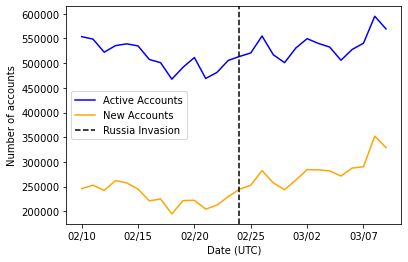

In [15]:
plt.plot(acc_df['day'], acc_df['active_accounts'], label = 'Active Accounts', color = 'blue')
plt.plot(acc_df['day'], acc_df['new_accounts'], label = 'New Accounts', color = 'orange')
plt.xlabel('Date (UTC)')
plt.xticks([x for x in range(0,30,5)])
plt.ylabel('Number of accounts')
plt.axvline(14, color = 'black', linestyle = '--', label = 'Russia Invasion')
plt.legend()
plt.gcf().savefig('accounts_3.pdf')

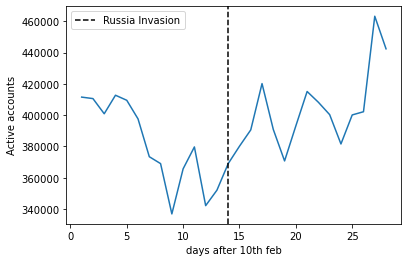

In [57]:
plt.plot(acc_df['day'], acc_df['active_accounts'])
plt.xlabel('days after 10th feb')
plt.ylabel('Active accounts')
plt.axvline(14, color = 'black', linestyle = '--', label = 'Russia Invasion')
plt.legend()
plt.gcf().savefig('accounts.pdf')

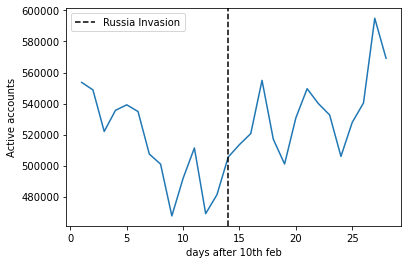

In [26]:
plt.plot(acc_df['day'], acc_df['active_accounts'])
plt.xlabel('days after 10th feb')
plt.ylabel('Active accounts')
plt.axvline(14, color = 'black', linestyle = '--', label = 'Russia Invasion')
plt.legend()
plt.gcf().savefig('accounts_2.pdf')

### Cálculo de degrees

In [2]:
def plot_outdegree(df, week, ax, fitreg):
    df_count = df.groupby(['from']).size().reset_index(name = 'count') #Agrupa e conta ocorrências de endereços diferentes na coluna from
    df_count.sort_values(by = 'count')
    df_degrees = df_count.groupby(['count']).size().reset_index(name = 'count_num')
    s = sns.regplot(data = df_degrees, x = 'count', y = 'count_num', label = 'Semana '+str(week), fit_reg = fitreg, ax = ax)
    s.set(xscale = 'log', yscale = 'log')
    s.set(xlabel = 'Grau de saída', ylabel = 'Número de nós')
    return s

def plot_indegree(df, week, ax, fitreg):
    df_count = df.groupby(['to']).size().reset_index(name = 'count') #Agrupa e conta ocorrências de endereços diferentes na coluna to
    df_count.sort_values(by = 'count')
    df_degrees = df_count.groupby(['count']).size().reset_index(name = 'count_num')
    s = sns.regplot(data = df_degrees, x = 'count', y = 'count_num', label = 'Semana '+str(week), fit_reg = fitreg, ax = ax)
    s.set(xscale = 'log', yscale = 'log')
    s.set(xlabel = 'Grau de entrada', ylabel = 'Número de nós')
    return s

def plot_degree(df, week, ax, fitreg): #Agrupa e conta ocorrências de endereços diferentes na coluna from e to e soma as 2
    df_count_1 = df.groupby(['from']).size().reset_index(name = 'count') 
    df_count_2 = df.groupby(['to']).size().reset_index(name = 'count')
    
    df_degrees_1 = df_count_1.groupby(['count']).size().reset_index(name = 'count_num')
    df_degrees_2 = df_count_2.groupby(['count']).size().reset_index(name = 'count_num')
    df_degrees_total = pd.concat([df_degrees_1, df_degrees_2])
    df_degrees_total = df_degrees_total.groupby(['count']).sum().reset_index()
    s = sns.regplot(data = df_degrees_total, x = 'count', y = 'count_num', label = 'Semana '+str(week), fit_reg = fitreg, ax = ax)
    s.set(xscale = 'log', yscale = 'log')
    s.set(xlabel = 'Grau', ylabel = 'Número de nós')
    return s

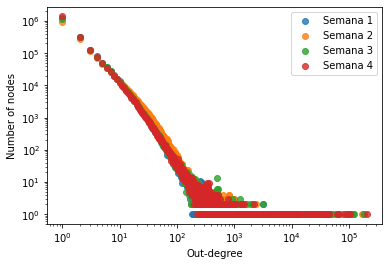

In [48]:
fig, ax = plt.subplots()

df_1 = pd.read_csv('fix_war_txs.csv')
df_1['timestamp'] = df_1['timestamp'].apply(int, base = 16)
plot_outdegree(df_1, 1, ax, False)
del df_1

df_2 = pd.read_csv('fix_war_txs_2.csv')
df_2['timestamp'] = df_2['timestamp'].apply(int, base = 16)
plot_outdegree(df_2, 2, ax, False)
del df_2

df_3 = pd.read_csv('fix_war_txs_3.csv')
df_3['timestamp'] = df_3['timestamp'].apply(int, base = 16)
plot_outdegree(df_3, 3, ax, False)
del df_3

df_4 = pd.read_csv('fix_war_txs_4.csv')
df_4['timestamp'] = df_4['timestamp'].apply(int, base = 16)
plot_outdegree(df_4, 4, ax, False)
del df_4

plt.legend()
fig.savefig('outdegree.pdf')

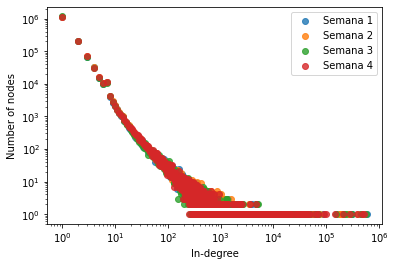

In [49]:
fig, ax = plt.subplots()

df_1 = pd.read_csv('fix_war_txs.csv')
plot_indegree(df_1, 1, ax, False)
del df_1

df_2 = pd.read_csv('fix_war_txs_2.csv')
plot_indegree(df_2, 2, ax, False)
del df_2

df_3 = pd.read_csv('fix_war_txs_3.csv')
plot_indegree(df_3, 3, ax, False)
del df_3

df_4 = pd.read_csv('fix_war_txs_4.csv')
plot_indegree(df_4, 4, ax, False)
del df_4

plt.legend()
fig.savefig('indegree.pdf')

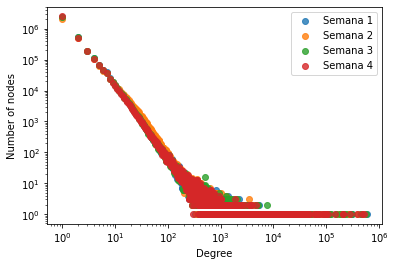

In [50]:
fig, ax = plt.subplots()

df_1 = pd.read_csv('fix_war_txs.csv')
plot_degree(df_1, 1, ax, False)
del df_1

df_2 = pd.read_csv('fix_war_txs_2.csv')
plot_degree(df_2, 2, ax, False)
del df_2

df_3 = pd.read_csv('fix_war_txs_3.csv')
plot_degree(df_3, 3, ax, False)
del df_3

df_4 = pd.read_csv('fix_war_txs_4.csv')
plot_degree(df_4, 4, ax, False)
del df_4

plt.legend()
fig.savefig('degree.pdf')

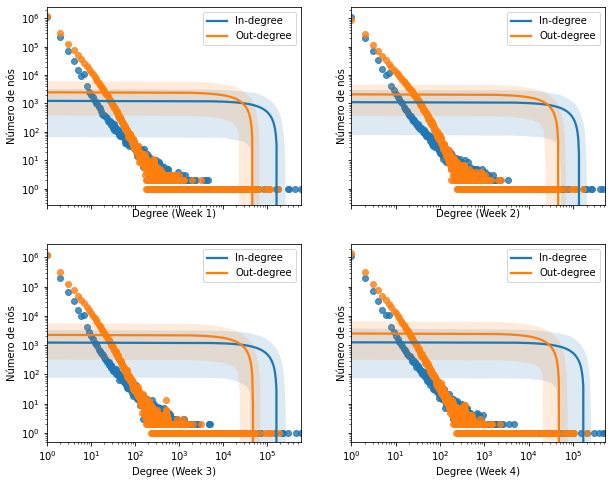

In [7]:
figure, axis = plt.subplots(2, 2, sharex = 'col', sharey = 'row',  figsize = (10,8))
df_1 = pd.read_csv('fix_war_txs.csv').query('blockNumber != "0xd84b0c"') #tirando o bloco a mais da coleta
plot_indegree(df_1, 1, axis[0,0], True).set(label = 'In-Degree') #acho que esses .set daqui n tão fazendo nada
plot_outdegree(df_1, 1, axis[0,0], True).set(label ='Out-Degree')
axis[0,0].set_xlabel('Degree (Week 1)')
axis[0,0].legend(['In-degree','Out-degree'])
del df_1

df_2 = pd.read_csv('fix_war_txs_2.csv')
plot_indegree(df_2, 1, axis[0,1], True).set(label = 'In-Degree')
plot_outdegree(df_2, 1, axis[0,1], True).set(label ='Out-Degree')
axis[0,1].set_xlabel('Degree (Week 2)')
axis[0,1].legend(['In-degree','Out-degree'])
del df_2

df_3 = pd.read_csv('fix_war_txs_3.csv')
plot_indegree(df_3, 1, axis[1,0], True).set(label = 'In-Degree')
plot_outdegree(df_3, 1, axis[1,0], True).set(label ='Out-Degree')
axis[1,0].set_xlabel('Degree (Week 3)')
axis[1,0].legend(['In-degree','Out-degree'])
del df_3

df_4 = pd.read_csv('fix_war_txs_4.csv')
plot_indegree(df_4, 1, axis[1,1], True).set(label = 'In-Degree')
plot_outdegree(df_4, 1, axis[1,1], True).set(label ='Out-Degree')
axis[1,1].set_xlabel('Degree (Week 4)')
axis[1,1].legend(['In-degree','Out-degree'])
del df_4
plt.show()
figure.savefig('degree_week.pdf')

In [23]:
df

,hash,blockNumber,timestamp,from,to,type,maxFeePerGas,maxPriorityFeePerGas,baseFee
0,0x6e99cdbd2dde75e2f858fddf85a0e9036d91687f976e...,0xd84b0c,0x6204556e,0xd1f02a2a18843aee77dbdc796dc3595542f93c99,0xdef1c0ded9bec7f1a1670819833240f027b25eff,0x2,0x2b87af3400,0x5a995c00,0x1a5f6f07a1
1,0x8e756478d96f702a818191c45a8a1700c98b6d636603...,0xd84b0c,0x6204556e,0x05e079968da688edaa67250d71e133b33a23dda4,0x55eb58655f8202ff839487886fedba2a1eb7b2d7,0x2,0x1a5f6f07a1,0x0,0x1a5f6f07a1
2,0xceb37462ce4662136b785c62ac2995f4c711361f4038...,0xd84b0c,0x6204556e,0x9064abe13d219ff7482f1a434eac8a8c8c9bcf30,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,0x2,0x1b55dc520a,0x59682f00,0x1a5f6f07a1
3,0x18534d52967136e4f5c7b763a2965850e26c1b4cddb4...,0xd84b0c,0x6204556e,0x607bd5bbc7c6a2111273b28d4309e5c04b024f00,0x46c4128981525aa446e02ffb2ff762f1d6a49170,0x2,0x27286346fd,0xcc8f43f5c,0x1a5f6f07a1
4,0xfe5409a5277b42c66f8cfc04b834ce34d0d01a818e8b...,0xd84b0c,0x6204556e,0x089b7584d5c87cc7693137e430bb1963ae333fc3,0x089b7584d5c87cc7693137e430bb1963ae333fc3,0x2,0x746a528800,0x746a528800,0x1a5f6f07a1
...,...,...,...,...,...,...,...,...,...
8154536,0x11aa4d2ccb00f9f28a338771649fe12de90da9e9737b...,0xd8fbec,0x620d8ff7,0xddc4c607b8a74e01d46e30761422b763050e4768,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,0x2,0xf903ec1b8,0x59682f00,0x904eec951
8154537,0x6c33ce7247e9a124f98e88372055318359c0f62b93b7...,0xd8fbec,0x620d8ff7,0xfa3cca6a31e30bf9a0133a679d33357bb282c995,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x2,0x1012c4d25a,0x59682f00,0x904eec951
8154538,0x40417751a1374c3991bbe337d8532d4cfcb2a3c26909...,0xd8fbec,0x620d8ff7,0x707b5a015d22e73a7b7f4ce2831b681b65388309,0x670cdd2a20d431230f569d027ddbbe5e67e89b6a,0x2,0x11f229f6bb,0x59682f00,0x904eec951
8154539,0xc68389db0a3fbe1c83525293720bf9967ec75dfedf4c...,0xd8fbec,0x620d8ff7,0xc0719b1040f7f8e904a6509f99335656c1d881ed,0x524cab2ec69124574082676e6f654a18df49a048,0x2,0x988448158,0x59682f00,0x904eec951


In [22]:
figure(figsize=(8, 6), dpi=80)
plt.show()

TypeError: 'Figure' object is not callable

### Testes adicionais abaixo, ainda não são nada pronto

In [45]:
df_degrees_total.reset_index()

,count,count_num
0,1,2349697
1,2,526946
2,3,196329
3,4,111053
4,5,66392
...,...,...
1536,178902,1
1537,300834,1
1538,311166,1
1539,436831,1


In [40]:
df_degrees_1

,count,count_num
0,1,1198265
1,2,314659
2,3,128181
3,4,78744
4,5,51062
...,...,...
840,90172,1
841,105849,1
842,111883,1
843,118074,1


### Início ranking

In [23]:
df = pd.read_csv('fix_war_txs.csv')
df_count = df.groupby(['to']).size().reset_index(name = 'count')
df_count = df_count.rename(columns = {'to' : 'from'})

df_count_aux = df.groupby(['from']).size().reset_index(name = 'count')
df_count_full = pd.concat([df_count, df_count_aux])
df_count_full = df_count_full.groupby(by = ['from']).sum()

del df 

df = pd.read_csv('fix_war_txs_2.csv')
df_count_2 = df.groupby(['to']).size().reset_index(name = 'count')
df_count_2 = df_count_2.rename(columns = {'to' : 'from'})

df_count_aux_2 = df.groupby(['from']).size().reset_index(name = 'count')
df_count_full_2 = pd.concat([df_count_2, df_count_aux_2])
df_count_full_2 = df_count_full_2.groupby(by = ['from']).sum()
del df

df_comparasion = df_count_full.merge(df_count_full_2, on = 'from', suffixes = ('_1','_2'), how = 'inner')
df_comparasion['diff'] = df_comparasion['count_2'] - df_comparasion['count_1']
df_comparasion.sort_values(by = ['diff']).iloc[-10:]

,count_1,count_2,diff
from,,,
0x2c4929295042cb95ab1900d323d634ee8def3c7a,1479,13020,11541
0xd23c25eb1bad8b1de60cbd313c09209055fd74c0,30,12433,12403
0x3845badade8e6dff049820680d1f14bd3903a5d0,20652,33372,12720
0x57f1887a8bf19b14fc0df6fd9b2acc9af147ea85,5798,18647,12849
0xc8c3cc5be962b6d281e4a53dbcce1359f76a1b85,8282,23074,14792
0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,162107,177374,15267
0x86c35fa9665002c08801805280ff6a077b23c98a,28,17220,17192
0x74312363e45dcaba76c59ec49a7aa8a65a67eed3,1505,25858,24353
0xe6949137b24ad50cce2cf6b124b3b874449a41fa,7518,35290,27772


In [2]:
df = pd.read_csv('fix_war_txs_2.csv')
df_count = df.groupby(['to']).size().reset_index(name = 'count')
df_count = df_count.rename(columns = {'to' : 'from'})

df_count_aux = df.groupby(['from']).size().reset_index(name = 'count')
df_count_full = pd.concat([df_count, df_count_aux])
df_count_full = df_count_full.groupby(by = ['from']).sum()

del df 

df = pd.read_csv('fix_war_txs_3.csv')
df_count_2 = df.groupby(['to']).size().reset_index(name = 'count')
df_count_2 = df_count_2.rename(columns = {'to' : 'from'})

df_count_aux_2 = df.groupby(['from']).size().reset_index(name = 'count')
df_count_full_2 = pd.concat([df_count_2, df_count_aux_2])
df_count_full_2 = df_count_full_2.groupby(by = ['from']).sum()
del df

df_comparasion = df_count_full.merge(df_count_full_2, on = 'from', suffixes = ('_2','_3'), how = 'inner')
df_comparasion['diff'] = df_comparasion['count_3'] - df_comparasion['count_2']
df_comparasion.sort_values(by = ['diff']).iloc[-10:]

,count_2,count_3,diff
from,,,
0xfb5c6815ca3ac72ce9f5006869ae67f18bf77006,23,12556,12533
0x3cd751e6b0078be393132286c442345e5dc49699,130776,144376,13600
0x8aff5ca996f77487a4f04f1ce905bf3d27455580,31121,44771,13650
0xea674fdde714fd979de3edf0f56aa9716b898ec8,167662,182908,15246
0xe6cd4727a1058e6973e973986d0493f1e7975ef8,7838,24114,16276
0x4f6742badb049791cd9a37ea913f2bac38d01279,2040,25816,23776
0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,184377,219918,35541
0xdac17f958d2ee523a2206206994597c13d831ec7,405875,454607,48732
0x7f268357a8c2552623316e2562d90e642bb538e5,476523,578360,101837


In [3]:
df = pd.read_csv('fix_war_txs_3.csv')
df_count = df.groupby(['to']).size().reset_index(name = 'count')
df_count = df_count.rename(columns = {'to' : 'from'})

df_count_aux = df.groupby(['from']).size().reset_index(name = 'count')
df_count_full = pd.concat([df_count, df_count_aux])
df_count_full = df_count_full.groupby(by = ['from']).sum()

del df 

df = pd.read_csv('fix_war_txs_4.csv')
df_count_2 = df.groupby(['to']).size().reset_index(name = 'count')
df_count_2 = df_count_2.rename(columns = {'to' : 'from'})

df_count_aux_2 = df.groupby(['from']).size().reset_index(name = 'count')
df_count_full_2 = pd.concat([df_count_2, df_count_aux_2])
df_count_full_2 = df_count_full_2.groupby(by = ['from']).sum()
del df

df_comparasion = df_count_full.merge(df_count_full_2, on = 'from', suffixes = ('_3','_4'), how = 'inner')
df_comparasion['diff'] = df_comparasion['count_4'] - df_comparasion['count_3']
df_comparasion.sort_values(by = ['diff']).iloc[-10:]

,count_3,count_4,diff
from,,,
0xbbbbfcb29c56a5e0e251164a2554637096155ba9,347,11440,11093
0x4cb18386e5d1f34dc6eea834bf3534a970a3f8e7,6176,19164,12988
0xdac17f958d2ee523a2206206994597c13d831ec7,454607,470937,16330
0x1c47ad80a8b0b467eb67ef23f2d4f772d500fb08,1993,19260,17267
0x7a250d5630b4cf539739df2c5dacb4c659f2488d,70473,90403,19930
0xea674fdde714fd979de3edf0f56aa9716b898ec8,182908,204517,21609
0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,235157,287951,52794
0xae45a8240147e6179ec7c9f92c5a18f9a97b3fca,12372,68597,56225
0xa090e606e30bd747d4e6245a1517ebe430f0057e,309571,385787,76216


### Fim ranking

In [21]:
df_count_full_2.sort_values(by = 'count')

,count
from,
0x7f6a0763d871e7811e4d917dea376632106a12cf,1
0x58a036f4fa7ff99761db6551a77affd12882e7f2,1
0x58a0320dbc916f4677b46e38e0150e6f7821c65e,1
0x58a02d77c87f84d77044a16e4cdefb874b76d7b7,1
0xb7f70a429d19bbc6fada2317280a15e7d3e32399,1
...,...
0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,178902
0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,300834
0xa090e606e30bd747d4e6245a1517ebe430f0057e,314566


In [18]:
df.groupby(['to']).size().reset_index(name = 'count').sort_values(by = 'count')

,to,count
762424,0x7ed6a5f75901af19b4506ea557d31dfb29d52119,1
945569,0x9dc00ff37dc377c60ecebb25ebfeff64548f4d90,1
945568,0x9dc00f109acfba2622f0fe48a522558fa4f1d509,1
945566,0x9dbfdcb5b17ccc51b46faa5f2a2ed6be47594ac0,1
945563,0x9dbfc04913561c386fbcb64298a3d4188922c864,1
...,...,...
963134,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,178902
631746,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,300834
962257,0xa090e606e30bd747d4e6245a1517ebe430f0057e,311166
1307869,0xdac17f958d2ee523a2206206994597c13d831ec7,436831


In [17]:
df

,hash,blockNumber,timestamp,from,to,type,maxFeePerGas,maxPriorityFeePerGas,baseFee
0,0x6e99cdbd2dde75e2f858fddf85a0e9036d91687f976e...,0xd84b0c,0x6204556e,0xd1f02a2a18843aee77dbdc796dc3595542f93c99,0xdef1c0ded9bec7f1a1670819833240f027b25eff,0x2,0x2b87af3400,0x5a995c00,0x1a5f6f07a1
1,0x8e756478d96f702a818191c45a8a1700c98b6d636603...,0xd84b0c,0x6204556e,0x05e079968da688edaa67250d71e133b33a23dda4,0x55eb58655f8202ff839487886fedba2a1eb7b2d7,0x2,0x1a5f6f07a1,0x0,0x1a5f6f07a1
2,0xceb37462ce4662136b785c62ac2995f4c711361f4038...,0xd84b0c,0x6204556e,0x9064abe13d219ff7482f1a434eac8a8c8c9bcf30,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,0x2,0x1b55dc520a,0x59682f00,0x1a5f6f07a1
3,0x18534d52967136e4f5c7b763a2965850e26c1b4cddb4...,0xd84b0c,0x6204556e,0x607bd5bbc7c6a2111273b28d4309e5c04b024f00,0x46c4128981525aa446e02ffb2ff762f1d6a49170,0x2,0x27286346fd,0xcc8f43f5c,0x1a5f6f07a1
4,0xfe5409a5277b42c66f8cfc04b834ce34d0d01a818e8b...,0xd84b0c,0x6204556e,0x089b7584d5c87cc7693137e430bb1963ae333fc3,0x089b7584d5c87cc7693137e430bb1963ae333fc3,0x2,0x746a528800,0x746a528800,0x1a5f6f07a1
...,...,...,...,...,...,...,...,...,...
8154536,0x11aa4d2ccb00f9f28a338771649fe12de90da9e9737b...,0xd8fbec,0x620d8ff7,0xddc4c607b8a74e01d46e30761422b763050e4768,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,0x2,0xf903ec1b8,0x59682f00,0x904eec951
8154537,0x6c33ce7247e9a124f98e88372055318359c0f62b93b7...,0xd8fbec,0x620d8ff7,0xfa3cca6a31e30bf9a0133a679d33357bb282c995,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x2,0x1012c4d25a,0x59682f00,0x904eec951
8154538,0x40417751a1374c3991bbe337d8532d4cfcb2a3c26909...,0xd8fbec,0x620d8ff7,0x707b5a015d22e73a7b7f4ce2831b681b65388309,0x670cdd2a20d431230f569d027ddbbe5e67e89b6a,0x2,0x11f229f6bb,0x59682f00,0x904eec951
8154539,0xc68389db0a3fbe1c83525293720bf9967ec75dfedf4c...,0xd8fbec,0x620d8ff7,0xc0719b1040f7f8e904a6509f99335656c1d881ed,0x524cab2ec69124574082676e6f654a18df49a048,0x2,0x988448158,0x59682f00,0x904eec951


In [80]:
df_2 = pd.read_csv('fix_war_txs_2.csv')
df_count = df_2.groupby(['from']).size().reset_index(name = 'count')
df_count.sort_values(by = 'count')
del df_2
df_3 = pd.read_csv('fix_war_txs_3.csv')
df_count_3 = df_3.groupby(['from']).size().reset_index(name = 'count')
df_count_3.sort_values(by = 'count')
df_comparasion = df_count.merge(df_count_3, on = 'from', suffixes = ('_2','_3'), how = 'inner')
df_comparasion['diff'] = df_comparasion['count_3'] - df_comparasion['count_2']
del df_3
df_comparasion.sort_values(by = ['diff'])

,from,count_2,count_3,diff
448888,0xd2c82f2e5fa236e114a81173e375a73664610998,27015,10868,-16147
315603,0x9430801ebaf509ad49202aabc5f5bc6fd8a3daf8,11093,3508,-7585
166163,0x4d9ff50ef4da947364bb9650892b2554e7be5e2b,8069,3313,-4756
431804,0xcac725bef4f114f728cbcfd744a731c2a463c3fc,5033,1323,-3710
309182,0x912fd21d7a69678227fe6d08c64222db41477ba0,12152,8950,-3202
...,...,...,...,...
387192,0xb5d85cbf7cb3ee0d56b3bb207d5fc4b82f43f511,109913,114389,4476
87817,0x28c6c06298d514db089934071355e5743bf21d60,40302,44911,4609
403291,0xbd5cdd2b3d04ce42605aaea7e8355ac0e0a12710,3870,11761,7891
54778,0x1938a448d105d26c40a52a1bfe99b8ca7a745ad0,5831,17197,11366


In [2]:
df_2 = pd.read_csv('fix_war_txs_2.csv')
df_count = df_2.groupby(['to']).size().reset_index(name = 'count')
df_count.sort_values(by = 'count')
del df_2
df_3 = pd.read_csv('fix_war_txs_3.csv')
df_count_3 = df_3.groupby(['to']).size().reset_index(name = 'count')
df_count_3.sort_values(by = 'count')
df_comparasion = df_count.merge(df_count_3, on = 'to', suffixes = ('_2','_3'), how = 'inner')
df_comparasion['diff'] = df_comparasion['count_3'] - df_comparasion['count_2']
del df_3
df_comparasion.sort_values(by = ['diff'])

,to,count_2,count_3,diff
194874,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,253573,8916,-244657
48267,0x1e4ede388cbc9f4b5c79681b7f94d36a11abebc9,59047,5017,-54030
316512,0xca7ca7bcc765f77339be2d648ba53ce9c8a262bd,42535,2757,-39778
165028,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,270651,235157,-35494
360287,0xe6949137b24ad50cce2cf6b124b3b874449a41fa,35290,591,-34699
...,...,...,...,...
125692,0x4f6742badb049791cd9a37ea913f2bac38d01279,1810,25432,23622
251935,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,184377,219918,35541
341919,0xdac17f958d2ee523a2206206994597c13d831ec7,405875,454607,48732
199854,0x7f268357a8c2552623316e2562d90e642bb538e5,476523,578360,101837


In [82]:
df_3 = pd.read_csv('fix_war_txs_3.csv')
df_count = df_3.groupby(['from']).size().reset_index(name = 'count')
df_count.sort_values(by = 'count')
del df_3
df_4 = pd.read_csv('fix_war_txs_4.csv')
df_count_4 = df_4.groupby(['from']).size().reset_index(name = 'count')
df_count_4.sort_values(by = 'count')
df_comparasion = df_count.merge(df_count_4, on = 'from', suffixes = ('_3','_4'), how = 'inner')
df_comparasion['diff'] = df_comparasion['count_4'] - df_comparasion['count_3']
del df_4
df_comparasion.sort_values(by = ['diff'])

,from,count_3,count_4,diff
457867,0xddfabcdc4d8ffc6d5beaf154f18b778f892a0740,105947,90142,-15805
126547,0x3cd751e6b0078be393132286c442345e5dc49699,120833,105900,-14933
374965,0xb5d85cbf7cb3ee0d56b3bb207d5fc4b82f43f511,114389,100189,-14200
484914,0xeb2629a2734e272bcc07bda959863f316f4bd4cf,91400,80330,-11070
461584,0xdfd5293d8e347dfe59e90efd55b2956a1343963d,42140,36501,-5639
...,...,...,...,...
161322,0x4d9ff50ef4da947364bb9650892b2554e7be5e2b,3313,9448,6135
19580,0x09344477fdc71748216a7b8bbe7f2013b893def8,49,7266,7217
243973,0x75e89d5979e4f6fba9f97c104c2f0afb3f1dcb88,12712,21777,9065
483320,0xea674fdde714fd979de3edf0f56aa9716b898ec8,182896,204513,21617


In [3]:
df = pd.read_csv('fix_war_txs_4.csv')
df_count = df.groupby(['to']).size().reset_index(name = 'count')
df_count_2 = df.groupby(['from']).size().reset_index(name = 'count')
df_count_2 = df_count_2.rename(columns = {'from' : 'to'})
df_count_full = pd.concat([df_count, df_count_2])
df_count_full = df_count_full.groupby(['to']).sum()
df_count_full.sort_values(by = 'count').iloc[-10:]

,count
to,
0xddfabcdc4d8ffc6d5beaf154f18b778f892a0740,111972
0x3cd751e6b0078be393132286c442345e5dc49699,123173
0xb5d85cbf7cb3ee0d56b3bb207d5fc4b82f43f511,127655
0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,146615
0xea674fdde714fd979de3edf0f56aa9716b898ec8,204517
0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,205684
0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,287951
0xa090e606e30bd747d4e6245a1517ebe430f0057e,385787
0xdac17f958d2ee523a2206206994597c13d831ec7,470937


In [27]:
df_count_full.sort_values(by = 'count').iloc[-10:]

,count
to,
0xddfabcdc4d8ffc6d5beaf154f18b778f892a0740,124379
0x3cd751e6b0078be393132286c442345e5dc49699,138776
0xb5d85cbf7cb3ee0d56b3bb207d5fc4b82f43f511,139406
0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,162107
0xea674fdde714fd979de3edf0f56aa9716b898ec8,175910
0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,178902
0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,300834
0xa090e606e30bd747d4e6245a1517ebe430f0057e,314566
0xdac17f958d2ee523a2206206994597c13d831ec7,436831


In [28]:
df_count.sort_values(by = 'count').iloc[-10:]

,to,count
897486,0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce,60736
817351,0x881d40237659c251811cec9c364ef91dc08d300c,61094
1503314,0xfbddadd80fe7bda00b901fbaf73803f2238ae655,62438
734745,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,87158
1149450,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,162107
963134,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,178902
631746,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,300834
962257,0xa090e606e30bd747d4e6245a1517ebe430f0057e,311166
1307869,0xdac17f958d2ee523a2206206994597c13d831ec7,436831
745150,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,582753


In [ ]:
df.groupby(['to']).size().reset_index(name = 'count').sort_values(by = 'count')

In [25]:
df_count_2 = df_count_2.rename(columns = {'from' : 'to'})
pd.concat([df_count, df_count_2])

,to,count
0,0x0000000000000000000000000000000000000000,138
1,0x0000000000000000000000000000000000000001,15
2,0x0000000000000000000000000000000000000064,1
3,0x0000000000000000000000000000000000000800,1
4,0x0000000000000000000000000000000000001010,2
...,...,...
1973571,0xfffff937c494975985a70792874a87da7ec75c5b,1
1973572,0xfffffd059e97c2bfc822569e13f636c3d176db41,91
1973573,0xffffff5f95f7d15c8f9b336906cc9f79744c1230,1
1973574,0xffffffff0861cde61840e5ddf74bed62e5dfe1b6,2


In [ ]:
df_count.sort_values(by = 'count').iloc[-10:]

,to,count
897486,0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce,60736
817351,0x881d40237659c251811cec9c364ef91dc08d300c,61094
1503314,0xfbddadd80fe7bda00b901fbaf73803f2238ae655,62438
734745,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,87158
1149450,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,162107
963134,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,178902
631746,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,300834
962257,0xa090e606e30bd747d4e6245a1517ebe430f0057e,311166
1307869,0xdac17f958d2ee523a2206206994597c13d831ec7,436831
745150,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,582753


In [10]:
df_count.sort_values(by = 'count').iloc[-10:]

,to,count
897486,0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce,60736
817351,0x881d40237659c251811cec9c364ef91dc08d300c,61094
1503314,0xfbddadd80fe7bda00b901fbaf73803f2238ae655,62438
734745,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,87158
1149450,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,162107
963134,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,178902
631746,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,300834
962257,0xa090e606e30bd747d4e6245a1517ebe430f0057e,311166
1307869,0xdac17f958d2ee523a2206206994597c13d831ec7,436831
745150,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,582753


In [69]:
df_count_2

,from,count
0,0x0000000000000d9054f605ca65a2647c2b521422,3
1,0x000000000000123ca35c69ba3f852a46b2a27c94,17
2,0x00000000000025cb79783c2bf2b8fb5c74b6950e,53
3,0x0000000000002cb29260612e744ec57d9d1fc5c6,1
4,0x0000000000025bb48b234f8212f5104d01402f0c,2
...,...,...
1646602,0xfffff6e70842330948ca47254f2be673b1cb0db7,17
1646603,0xfffffd059e97c2bfc822569e13f636c3d176db41,102
1646604,0xffffffb6c0ec98d9adadb57268bf418be2cb8b42,1
1646605,0xfffffff728c6677d6a435abfec460aa5bfae273e,3


In [15]:
test = {'A': [1, 2, 2], 'B': [1,1,1]}
df_test = pd.DataFrame(test)
df_test.groupby(['A']).sum().reset_index('A')

,A,B
0,1,1
1,2,2


In [80]:
df = pd.read_csv('fix_war_txs_4.csv')


SyntaxError: Python keyword not valid identifier in numexpr query (<unknown>, line 1)

In [95]:
df.query('blockNumber == "0xdaa29e"')

,hash,blockNumber,timestamp,from,to,type,maxFeePerGas,maxPriorityFeePerGas,baseFee
3163952,0x0bec8316731a20801c80ada5af5f7d58a758566f6a3b...,0xdaa29e,0x6223ab6d,0x60b86af869f23aeb552fb7f3cabd11b829f6ab2f,0xa57bd00134b2850b2a1c55860c9e9ea100fdd6cf,0x2,0xc98e14657,0x1,0x865eb843a
3163953,0xf2a7bc21ef8bb6dfce722af6c70aa424bfcb1b247dbc...,0xdaa29e,0x6223ab6d,0xe020a1d1f47486fcf90447c98a569966f4ad4b40,0x000000000dfde7deaf24138722987c9a6991e2d4,0x2,0xe46dd2d96,0x165a0bc00,0x865eb843a
3163954,0x8e031ee9693472dd3e1f5614a6794dd6ec529e4df818...,0xdaa29e,0x6223ab6d,0x6eaab1a8b0d81bf13386f80317f7ecde4fcf3140,0xdac17f958d2ee523a2206206994597c13d831ec7,0x0,-1,-1,0x865eb843a
3163955,0x5feff4f87b573ab49efca928fae7956eaf14fe497c70...,0xdaa29e,0x6223ab6d,0xd68fe83d3834bf35c6e1aa8a9d81c56249a61881,0xd68fe83d3834bf35c6e1aa8a9d81c56249a61881,0x2,0x3a8c1d425a0,0x23985f71eb,0x865eb843a
3163956,0xf630a28673f400f94a88237cc15957cd933f6bd9d97f...,0xdaa29e,0x6223ab6d,0xef71d6c646e4c109cb8e1df89f3f33c2e3a5a91c,0x8aff5ca996f77487a4f04f1ce905bf3d27455580,0x2,0x2cf3f473d73,0x1f1063b88b,0x865eb843a
...,...,...,...,...,...,...,...,...,...
3164309,0x4c31d49328c529b5e04dfb78cf988f2f8992a4136a11...,0xdaa29e,0x6223ab6d,0x98c5be8727be7e999a019c8b7af650dc5bbd9e16,0x7f268357a8c2552623316e2562d90e642bb538e5,0x2,0xbc74eef3a,0x59682f00,0x865eb843a
3164310,0x7183518bf978e292ff317ec702de82e19923e6e99779...,0xdaa29e,0x6223ab6d,0xe76dbbcae94f3e59337a2e038c73eeead08efa41,0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce,0x2,0xbc74eef3a,0x59682f00,0x865eb843a
3164311,0x9dea9df9b2e9a668544fef81cc64a1ba9bf5c461f30e...,0xdaa29e,0x6223ab6d,0x6009abc302dc47c00099fea6ba56202cc6cf3e93,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,0x2,0xbc74eef3a,0x59682f00,0x865eb843a
3164312,0x7fc08e82d045c235fec80c8cb1b306e3b522e240600d...,0xdaa29e,0x6223ab6d,0xa3442905c5c0de9d29e2cd660c859e91d7b5226e,0x7f268357a8c2552623316e2562d90e642bb538e5,0x2,0xbc74eef3a,0x59682f00,0x865eb843a


In [96]:
df.query('to == "0x165cd37b4c644c2921454429e7f9358d18a45e14"')

,hash,blockNumber,timestamp,from,to,type,maxFeePerGas,maxPriorityFeePerGas,baseFee
35,0x4e5537d589658127fea886747ca4dd9a5f757b121a36...,0xda5d02,0x62200502,0x428569b58c7c96964eafb6214768508b6b2e40d4,0x165cd37b4c644c2921454429e7f9358d18a45e14,0x2,0xfc0a198f2,0x77359400,0xb9a2f8e05
101,0x326054fee9350f616f2a39dca1927b5268cf639ccf15...,0xda5d02,0x62200502,0x84d8f1613c633d686dbbd965d074e4a5cc4f88ea,0x165cd37b4c644c2921454429e7f9358d18a45e14,0x2,0xf0c500c5f,0x59682f00,0xb9a2f8e05
102,0xf4a588e4a907e651fba703b346afbc1f19067518b492...,0xda5d02,0x62200502,0x8b5190a4ff105994055f60c9e8848513e1afc175,0x165cd37b4c644c2921454429e7f9358d18a45e14,0x2,0xf0c500c5f,0x59682f00,0xb9a2f8e05
111,0x19624ae93f4bc446b5a53bfba7a4fdfd96a54392c8f9...,0xda5d02,0x62200502,0xcf256ff60b131198262b016370bb7c4f98a041da,0x165cd37b4c644c2921454429e7f9358d18a45e14,0x2,0xf0c500c5f,0x59682f00,0xb9a2f8e05
136,0x14b223450ce1d0d258a49190b0a791c3cfde7c526013...,0xda5d02,0x62200502,0x5e3b9dc3405d1053afac07dc5d214a0dc48e945d,0x165cd37b4c644c2921454429e7f9358d18a45e14,0x2,0xf0c500c5f,0x59682f00,0xb9a2f8e05
...,...,...,...,...,...,...,...,...,...
8020610,0x7002596c3d1484033f609cb8a3d05c1fcedbc2da5df7...,0xdb0b85,0x62292c5a,0x46340b20830761efd32832a74d7169b29feb9758,0x165cd37b4c644c2921454429e7f9358d18a45e14,0x0,-1,-1,0x8999c0abd
8027832,0x16f633a3aa813645fcce25ec466ceaa41440c0ad55bd...,0xdb0bb5,0x62292e84,0x36b2da02e85f891570417194374062cbb8537aa5,0x165cd37b4c644c2921454429e7f9358d18a45e14,0x2,0x7ea8ed400,0x77359400,0x684cba9ba
8055937,0x57c0ae13cd4185a1517acc99b354c5b13bbfc83d1ebd...,0xdb0c65,0x622936aa,0x5ce3b110057cb841916046491631b1d95ad3b8c9,0x165cd37b4c644c2921454429e7f9358d18a45e14,0x2,0x8cd87eb7a,0x59682f00,0x5f4ac78ba
8072237,0xb83423dea7280154bc1c027ec15be1ff6df458171a9f...,0xdb0cd8,0x62293bf3,0x2acce63267f529e1a42577cc6b63e49c2479c59e,0x165cd37b4c644c2921454429e7f9358d18a45e14,0x2,0x55e57551f,0x59682f00,0x412c53679


In [93]:
df.tail()

,hash,blockNumber,timestamp,from,to,type,maxFeePerGas,maxPriorityFeePerGas,baseFee
8084175,0x63dda66168a23472ad427c17102ffd98fc15421b02b7...,0xdb0d23,0x62293f70,0xbab53210dc1baea92d0275008bc74ae03477fa8c,0x7d2a86d97146cbec90cf4d9fdf170a717b708906,0x2,0x6532cca0f,0x59682f00,0x598708315
8084176,0xf403f332fbf74a77fff4d31f2611565e1af98475220c...,0xdb0d23,0x62293f70,0xa148f43b6aca0f99e3a831ed07f158ce4cde0319,0x7f268357a8c2552623316e2562d90e642bb538e5,0x2,0x6532cca0f,0x59682f00,0x598708315
8084177,0xca0a73eea3485231229517f5e26268201602018e775b...,0xdb0d23,0x62293f70,0x897051e1b672cef6038f822951fc443a03529c00,0xa47c8bf37f92abed4a126bda807a7b7498661acd,0x2,0x6532cca0f,0x59682f00,0x598708315
8084178,0xc441de3f306570d89e5e0dd574f777f6466f34b5b96a...,0xdb0d23,0x62293f70,0x6c5cb704af78f3e7f8a7278accc38ac600794dbd,0x3377767d0e0e863794d634c23251724f8a27774b,0x2,0x6532cca0f,0x59682f00,0x598708315
8084179,0x07d706a4f7861ac0f0484ea9611b9b20674942ea9d21...,0xdb0d23,0x62293f70,0xb3ab85125262f3a94d86eba7f4edd98f94fbf71e,0x9d39c9fc474f7169ad6bc97a434ff59ec33a1b7b,0x2,0x6532cca0f,0x59682f00,0x598708315


In [2]:
df_1 = pd.read_csv('fix_war_txs.csv').query('blockNumber != "0xd84b0c"')
df_1 = df_1.groupby(['blockNumber']).first()[['blockNumber','baseFee']]

KeyError: "['blockNumber'] not in index"

In [7]:
df_1.groupby('blockNumber').first()[['baseFee']]

,baseFee
blockNumber,
0xd84b0d,0x1dab3ae3dd
0xd84b0e,0x1dc1130562
0xd84b0f,0x1a97e3623c
0xd84b10,0x1dea9428b8
0xd84b11,0x21a6f3ed9d
...,...
0xd8fbe8,0xc944a1c48
0xd8fbe9,0xba7bdf4ed
0xd8fbea,0xa519e7f0c


In [83]:
df.columns

Index(['hash', 'blockNumber', 'timestamp', 'from', 'to', 'type',
       'maxFeePerGas', 'maxPriorityFeePerGas', 'baseFee'],
      dtype='object')

In [8]:
df_1 = pd.read_csv('fix_war_txs.csv').query('blockNumber != "0xd84b0c"')
df_1 = df_1.groupby('blockNumber').first()[['baseFee']]

df_2 = pd.read_csv('fix_war_txs_2.csv')
df_2 = df_2.groupby('blockNumber').first()[['baseFee']]

df_3 = pd.read_csv('fix_war_txs_3.csv')
df_3 = df_3.groupby('blockNumber').first()[['baseFee']]

df_4 = pd.read_csv('fix_war_txs_4.csv')
df_4 = df_4.groupby('blockNumber').first()[['baseFee']]

df_base = pd.concat([df_1,df_2,df_3,df_4])
del df_1
del df_2 
del df_3 
del df_4 

In [9]:
df_base.apply(lambda x: x.astype(str).map(lambda x: int(x, base=16)))

,baseFee
blockNumber,
0xd84b0d,127426814941
0xd84b0e,127793300834
0xd84b0f,114217411132
0xd84b10,128489629880
0xd84b11,144534924701
...,...
0xdb0d1f,21713705969
0xdb0d20,20532198412
0xdb0d21,18992433743


In [12]:
plt.plot(df_base.index, df_base['baseFee'])

Error in callback <function flush_figures at 0x0000021981AF8EE0> (for post_execute):


KeyboardInterrupt: 

In [13]:
df_base.reset_index(inplace = True)

In [14]:
sns.relplot(data = df_base, x = 'blockNumber', y = 'baseFee')

Error in callback <function flush_figures at 0x0000021981AF8EE0> (for post_execute):


KeyboardInterrupt: 